In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 2

In [3]:
#stuff to do: write code to scan this string, and find conv, df, in, out of 2d
f = open("Resnet18.txt")
res_layers = []
for line in f:
    text = line.split()
    if len(text)>1 and (("Conv" in text[1])): # or ("Linear" in text[1])):
        #print(line)
        #in_chan, out_chan, k_size, stride
        if "Conv" in text[1]:
            in_chan = int(text[1].split('(')[1][:-1])
            #print(in_chan)
            out_chan = int(text[2][:-1])
            #print(out_chan)
            k_size = int(text[3].split('(')[1][:-1]) #assumes square kernel
            #print(k_size)
            stride =  int(text[5].split('(')[1][:-1])
            #print(stride)
        res_layers.append([in_chan,out_chan,k_size,stride])
res_layers.append([512,1000])
print(res_layers)

f2 = open("VGG11.txt")
vgg_layers = []
for line in f2:
    text = line.split()
    if len(text)>1 and (("Conv" in text[1])): # or ("Linear" in text[1])):
        #print(line)
        #in_chan, out_chan, k_size, stride
        if "Conv" in text[1]:
            in_chan = int(text[1].split('(')[1][:-1])
            #print(in_chan)
            out_chan = int(text[2][:-1])
            #print(out_chan)
            k_size = int(text[3].split('(')[1][:-1]) #assumes square kernel
            #print(k_size)
            stride =  int(text[5].split('(')[1][:-1])
            #print(stride)
        vgg_layers.append([in_chan,out_chan,k_size,stride])
vgg_layers.append([25088,4096])
vgg_layers.append([4096,4096])
vgg_layers.append([4096,1000])
print(vgg_layers)

"""
TODO: 
1) Do the same for above for VGG11! (Probs just copy paste and make a new array)
2) Calculate the Nl,Dl, Rla, Rlw
3) Finally do the compmutation in slide 7 here: https://courses.grainger.illinois.edu/ece498nsu/fa2020/secure/lectures/4-Finite-precision-DPs-2020-updated.pdf

"""

[[3, 64, 7, 2], [64, 64, 3, 1], [64, 64, 3, 1], [64, 64, 3, 1], [64, 64, 3, 1], [64, 128, 3, 2], [128, 128, 3, 1], [64, 128, 1, 2], [128, 128, 3, 1], [128, 128, 3, 1], [128, 256, 3, 2], [256, 256, 3, 1], [128, 256, 1, 2], [256, 256, 3, 1], [256, 256, 3, 1], [256, 512, 3, 2], [512, 512, 3, 1], [256, 512, 1, 2], [512, 512, 3, 1], [512, 512, 3, 1], [512, 1000]]
[[3, 64, 3, 1], [64, 128, 3, 1], [128, 256, 3, 1], [256, 256, 3, 1], [256, 512, 3, 1], [512, 512, 3, 1], [512, 512, 3, 1], [512, 512, 3, 1], [25088, 4096], [4096, 4096], [4096, 1000]]


'\nTODO: \n1) Do the same for above for VGG11! (Probs just copy paste and make a new array)\n2) Calculate the Nl,Dl, Rla, Rlw\n3) Finally do the compmutation in slide 7 here: https://courses.grainger.illinois.edu/ece498nsu/fa2020/secure/lectures/4-Finite-precision-DPs-2020-updated.pdf\n\n'

In [4]:
# for linear (numrow,numcols)
# Nl Number of Dot Products is image_size^2*out_chan/stride in conv and len(col) aka numrows in linear
# Dl dot product dim is kernalsize^2*in_chan and numcols in linear
# Rla number of activations = out_chan*img_size^2 so numrows in linear
# Rlw number of weightsRlw = k_size^2*in_chan*out_chan and numrows*numcols in linear

#this assumes 32x32x3 input
img_size = 32*32
for NN in [res_layers,vgg_layers]:
    CC, RC = 0, 0
    for l in NN:
        if len(l)==4: 
            #convolutional layer
            in_chan, out_chan, k_size, stride = l
            Nl = img_size * out_chan / stride
            Dl = k_size**2 * in_chan
            Rla = out_chan * img_size
            Rlw = k_size**2 * in_chan*out_chan
        else:
            #linear layer
            numrows, numcols = l
            Nl = numrows
            Dl = numcols
            Rla = numrows
            RLw = numrows*numcols
        CC += Nl * (Dl * 10 * 10 + (Dl - 1) * (10 + 10 + np.log2(Dl) - 1))
        RC += Rla * 10 + Rlw * 10
    if NN == res_layers: 
        print("Resnet18:")
    else:
        print("\nVGG11:")
    print("Computational Cost:","{:,}".format(CC) ,"\nRepresentational Cost:","{:,}".format(RC))


Resnet18:
('Computational Cost:', '1.37909185825e+12', '\nRepresentational Cost:', '184,419,200')

VGG11:
('Computational Cost:', '1.25155229282e+12', '\nRepresentational Cost:', '191,469,440')


## Problem 3 -- in nn_inference_release folder

In [5]:
#4.3 --> Write down gradient and update equation!
#3.1 you need dynamic ranges, then do quantization
#3.2 you need all four files
activation_dr= np.load("activation_dynamic_range.npy") 
#each index of the array corresponds to each layer and that will have maximum value given by
weight_dr=np.load("weight_dynamic_range.npy")
print(activation_dr)
print(weight_dr)

# 4 6 7, for any of the weights, put all weights in plot and give the numbers
"""4) Hints:
Plot the convergence curve means plot MSE convergence curve, and plot weights!
convergence around 3.1, conversion around -.7 or -.8
you will see many different values
pay attention to initialization! That will change result a lot.

if you use a lot of samples, it should match your analytic evaluation
"""

#p7 critical path delay, most amount of time you need to get to end. 

IOError: [Errno 2] No such file or directory: 'activation_dynamic_range.npy'

In [6]:

def UniformLevels(r,m):
    #this will place levels at either end of r and uniformly between
    return np.arange(-r,r+r/m,2*r/(m-1))
    
print(np.array([.2])-UniformLevels(1,5))
print(np.zeros((5,2)))

ZeroDivisionError: division by zero

## Problem 4

In [7]:
w1,w2,w3 = np.random.randn(), np.random.randn(), np.random.randn()
n_samples = 10000
x1,x2 = 0,0
mu = .2

xs = np.zeros((n_samples,2))
for i in range(n_samples):
    angle = np.pi * np.random.uniform(0, 2)
    x1 = np.cos(angle)
    x2 = np.sin(angle)
    xs[i] = [x1,x2]


errors = []
weights = []

for x1,x2 in xs:
    #determine prediction
    y1_t = w1*x1 + w2*x2
    y1 = y1_t**2
    y2_t = w3*y1
    y2 = np.log(1+y2_t**2)
    
    #determine true value
    y = np.arctan2(x2,x1)
    
    #error
    errors.append((y-y2)**2)
    
    #update weights:
    w1 += -mu*8*(y2-y)*y1_t*w3*x1*2*y2_t/(1+y2_t**2)
    w2 += -mu*8*(y2-y)*y1_t*w3*x2*2*y2_t/(1+y2_t**2)
    w3 += -mu*4*y1*(y2-y)*2*y2_t/(1+y2_t**2)
    weights.append([w1,w2,w3])
    
#loop through xs,
#determine the xs and ys
#determine error

#print(errors)
print("Wegihts w1,w2,w3", w1,w2,w3)

# fig=plt.figure(figsize=(20,10))
# ax=fig.add_subplot(111)
# line1, = ax.plot(range(len(errors)), errors ,label='Prediction',linewidth=2,color='b',marker='o',markersize=10)
# line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
# #plt.legend(handles=[line1],loc=0,fontsize=20)
# ax.grid()
# ax.set_title("Error convergence")
# ax.set_xlabel(r'Iterations',fontsize=20)
# ax.set_ylabel('Error',fontsize=20)
# ax.tick_params(axis='both',labelsize=15)
# #ax.set_xticks(np.arange(1,20,2))
# plt.show()

print("Final MSE Error:", errors[-1])

('Wegihts w1,w2,w3', -0.22288487332677651, -0.72256787657022414, 0.0)
('Final MSE Error:', 0.67312000006072736)


In [8]:
print("Wegihts w1,w2,w3", w1,w2,w3)
print("Final MSE Error:", errors[-1])
print("Average MSE Error of last 5000 iterations:",sum(errors[-5000:])/5000 )

('Wegihts w1,w2,w3', -0.22288487332677651, -0.72256787657022414, 0.0)
('Final MSE Error:', 0.67312000006072736)
('Average MSE Error of last 5000 iterations:', 3.3204026377848588)


In [10]:
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(errors)), errors)
plt.title("Convergence of MSE")
plt.xlabel("Iterations")
plt.ylabel("MSE")
print(sum(errors[-5000:])/5000)

#print(errors[-500:])
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(weights)), weights)
plt.legend(["w1","w2","w3"])
plt.title("Convergence of Weigths")
plt.xlabel("Iterations")
plt.ylabel("Weights")


3.32040263778


Text(0,0.5,u'Weights')

## Question 6 (lecture 6 as well!)

In [3]:
#note 3 tap means 3 previous values
n_sample = 50000

gn = [np.random.normal(),np.random.normal(),np.random.normal()]
data = []
for idx in range(3,n_sample+3):
    g = np.random.normal()
    gn.append(g)
    data.append(.1*g+.5*gn[idx-1]-.5*gn[idx-2]+.1*gn[idx-3]) # x_[n] = u_[n] + 0.8*x_[n-1]

X = []
y = []
for three_sample_before, two_sample_before, one_sample_before, curr in zip(data[0:-3:], data[1:-2:], data[2:-1:],data[3::]):
    vector1 = np.array([one_sample_before, two_sample_before, three_sample_before]) 
    vector2 = np.array([curr, one_sample_before, two_sample_before]) # for R
    X.append(vector1)
    y.append(curr)

X = np.vstack(X)
y = np.array(y)

Mu 0.0
Last weight Ensemble: [5.27141294 0.32104059 0.52060598]
last error Ensemble: 16.35842297246613
Mu 0.01
Last weight Ensemble: [0.54040194 2.23789002 2.02040743]
last error Ensemble: 2.6738803348707023
Mu 0.02
Last weight Ensemble: [2.14115769 3.91191584 2.09712394]
last error Ensemble: 5.73988100947191
Mu 0.03
Last weight Ensemble: [2.37463656 4.08143731 2.75535893]
last error Ensemble: 6.44803673291787
Mu 0.04
Last weight Ensemble: [0.58336043 1.56666604 1.14901404]
last error Ensemble: 1.5240564092977535
Mu 0.05
Last weight Ensemble: [1.10938334 2.51037448 1.88632518]
last error Ensemble: 2.932012592080352
Mu 0.06
Last weight Ensemble: [0.08552468 0.64624002 0.45142235]
last error Ensemble: 0.6924722348212373
Mu 0.07
Last weight Ensemble: [0.86433518 1.79559431 1.22198243]
last error Ensemble: 1.836515328090158
Mu 0.08
Last weight Ensemble: [0.82692682 1.71609126 1.15605961]
last error Ensemble: 1.7359992055216003
Mu 0.09
Last weight Ensemble: [0.3318762  1.05188938 0.7446363 

Mu 0.76
Last weight Ensemble: [-0.52791313 -0.24290015 -0.11664724]
last error Ensemble: 0.350672313628475
Mu 0.77
Last weight Ensemble: [-0.56365723 -0.29188568 -0.15034263]
last error Ensemble: 0.34565955343779636
Mu 0.78
Last weight Ensemble: [-0.61182771 -0.35816459 -0.19603736]
last error Ensemble: 0.3412987673108789
Mu 0.79
Last weight Ensemble: [-0.61393914 -0.36064082 -0.19729036]
last error Ensemble: 0.3411371188789491
Mu 0.8
Last weight Ensemble: [-0.771937   -0.57947477 -0.34903514]
last error Ensemble: 0.34679768013200835
Mu 0.81
Last weight Ensemble: [-0.77730647 -0.5866171  -0.35345962]
last error Ensemble: 0.34742291073780684
Mu 0.8200000000000001
Last weight Ensemble: [-0.67148963 -0.43930178 -0.25048975]
last error Ensemble: 0.3395546081024666
Mu 0.8300000000000001
Last weight Ensemble: [-0.96381859 -0.84527757 -0.53211666]
last error Ensemble: 0.39391649389765904
Mu 0.84
Last weight Ensemble: [-1.03267142 -0.9408764  -0.59792076]
last error Ensemble: 0.421663515354693

Mu 1.47
Last weight Ensemble: [4075597.37312621 5724184.78296446 3974347.56570665]
last error Ensemble: 10228522643960.648
Mu 1.48
Last weight Ensemble: [1560620.30013261 2191701.82040989 1521921.94571113]
last error Ensemble: 1499654162492.7102
Mu 1.49
Last weight Ensemble: [ 72618.93930964 101975.59634966  70821.81423319]
last error Ensemble: 3246891673.721876
Mu 1.5
Last weight Ensemble: [3791949.1922224  5324331.1563288  3698241.16447001]
last error Ensemble: 8852101529629.426
Mu 1.51
Last weight Ensemble: [ 805507.74252084 1130912.88731173  785633.25249843]
last error Ensemble: 399411428018.64264
Mu 1.52
Last weight Ensemble: [1645169.82586783 2309538.60612028 1604637.41604435]
last error Ensemble: 1665938976383.164
Mu 1.53
Last weight Ensemble: [201923.86407343 283436.95731889 196956.28277564]
last error Ensemble: 25094025307.505795
Mu 1.54
Last weight Ensemble: [-677204.63970101 -950473.27497262 -660564.03928898]
last error Ensemble: 282217485543.9615
Mu 1.55
Last weight Ensembl

Mu 2.14
Last weight Ensemble: [9.65326564e+11 1.34216276e+12 9.40546745e+11]
last error Ensemble: 5.6729304801219954e+23
Mu 2.15
Last weight Ensemble: [4.83372761e+10 6.70720651e+10 4.69146012e+10]
last error Ensemble: 1.4169798908673547e+21
Mu 2.16
Last weight Ensemble: [-1.75634155e+12 -2.44157229e+12 -1.71167788e+12]
last error Ensemble: 1.8777890475420111e+24
Mu 2.17
Last weight Ensemble: [-2.05266890e+12 -2.85292947e+12 -2.00020226e+12]
last error Ensemble: 2.564165932972897e+24
Mu 2.18
Last weight Ensemble: [-2.78206454e+12 -3.86601695e+12 -2.71075428e+12]
last error Ensemble: 4.709202102275779e+24
Mu 2.19
Last weight Ensemble: [-3.36756587e+12 -4.67886397e+12 -3.28105255e+12]
last error Ensemble: 6.898521714733179e+24
Mu 2.2
Last weight Ensemble: [-2.35847680e+12 -3.27631162e+12 -2.29776285e+12]
last error Ensemble: 3.382989411047015e+24
Mu 2.21
Last weight Ensemble: [-5.77214278e+12 -8.01716535e+12 -5.62326165e+12]
last error Ensemble: 2.025940212807931e+25
Mu 2.22
Last weight 

Mu 2.81
Last weight Ensemble: [-1.28989546e+18 -1.77758639e+18 -1.25296967e+18]
last error Ensemble: 1.0020120144885186e+36
Mu 2.82
Last weight Ensemble: [-2.74423146e+18 -3.78139374e+18 -2.66553373e+18]
last error Ensemble: 4.534692608339782e+36
Mu 2.83
Last weight Ensemble: [-2.04759400e+18 -2.82116293e+18 -1.98875142e+18]
last error Ensemble: 2.5242526479649542e+36
Mu 2.84
Last weight Ensemble: [-9.59391792e+17 -1.32160768e+18 -9.31635456e+17]
last error Ensemble: 5.540092647509523e+35
Mu 2.85
Last weight Ensemble: [4.94476172e+18 6.81185254e+18 4.80266248e+18]
last error Ensemble: 1.4718641732875085e+37
Mu 2.86
Last weight Ensemble: [1.43201121e+19 1.97250038e+19 1.39075171e+19]
last error Ensemble: 1.2342501410928517e+38
Mu 2.87
Last weight Ensemble: [3.09966256e+19 4.26915112e+19 3.01019131e+19]
last error Ensemble: 5.782063618058033e+38
Mu 2.88
Last weight Ensemble: [4.27135546e+19 5.88234838e+19 4.14785905e+19]
last error Ensemble: 1.097821259101869e+39
Mu 2.89
Last weight Ense

Mu 3.48
Last weight Ensemble: [-2.07795611e+25 -2.85003276e+25 -2.01298076e+25]
last error Ensemble: 2.5843257099611563e+50
Mu 3.49
Last weight Ensemble: [-1.71178664e+25 -2.34770764e+25 -1.65820179e+25]
last error Ensemble: 1.7536663224318182e+50
Mu 3.5
Last weight Ensemble: [-2.86181888e+25 -3.92480173e+25 -2.77213542e+25]
last error Ensemble: 4.901234848829437e+50
Mu 3.5100000000000002
Last weight Ensemble: [-3.85560951e+25 -5.28749674e+25 -3.73465037e+25]
last error Ensemble: 8.895721413615368e+50
Mu 3.52
Last weight Ensemble: [-5.65042707e+25 -7.74854444e+25 -5.47296726e+25]
last error Ensemble: 1.9104330955939387e+51
Mu 3.5300000000000002
Last weight Ensemble: [-6.22108173e+25 -8.53074256e+25 -6.02548775e+25]
last error Ensemble: 2.315664436985764e+51
Mu 3.54
Last weight Ensemble: [-3.18287294e+25 -4.36438037e+25 -3.08269377e+25]
last error Ensemble: 6.061181248866841e+50
Mu 3.5500000000000003
Last weight Ensemble: [-7.04146280e+25 -9.65492336e+25 -6.81959857e+25]
last error Ense

Mu 4.14
Last weight Ensemble: [-9.92591159e+31 -1.35915212e+32 -9.59526906e+31]
last error Ensemble: 5.881181631902361e+63
Mu 4.15
Last weight Ensemble: [-1.44135683e+32 -1.97362877e+32 -1.39330368e+32]
last error Ensemble: 1.2401021679145064e+64
Mu 4.16
Last weight Ensemble: [-1.06344822e+32 -1.45615220e+32 -1.02796464e+32]
last error Ensemble: 6.7505320402652e+63
Mu 4.17
Last weight Ensemble: [-1.32458714e+32 -1.81370893e+32 -1.28035365e+32]
last error Ensemble: 1.0472670079455969e+64
Mu 4.18
Last weight Ensemble: [-2.88145094e+32 -3.94543685e+32 -2.78514791e+32]
last error Ensemble: 4.955757678104771e+64
Mu 4.19
Last weight Ensemble: [-5.68178301e+32 -7.77974728e+32 -5.49173199e+32]
last error Ensemble: 1.926851883293125e+65
Mu 4.2
Last weight Ensemble: [-5.58063236e+32 -7.64119717e+32 -5.39381187e+32]
last error Ensemble: 1.8588207125619479e+65
Mu 4.21
Last weight Ensemble: [-4.79943223e+32 -6.57150996e+32 -4.63863253e+32]
last error Ensemble: 1.3748085531037571e+65
Mu 4.22
Last we

Mu 4.8
Last weight Ensemble: [-7.54508061e+36 -1.03330346e+37 -7.28105911e+36]
last error Ensemble: 3.396184845797556e+73
Mu 4.8100000000000005
Last weight Ensemble: [-2.37213394e+37 -3.24868919e+37 -2.28907172e+37]
last error Ensemble: 3.356932516400245e+74
Mu 4.82
Last weight Ensemble: [-2.51947352e+37 -3.45051406e+37 -2.43119357e+37]
last error Ensemble: 3.786906175583434e+74
Mu 4.83
Last weight Ensemble: [-2.13839481e+37 -2.92864705e+37 -2.06341796e+37]
last error Ensemble: 2.7279825980346087e+74
Mu 4.84
Last weight Ensemble: [-2.80272131e+37 -3.83852428e+37 -2.70438696e+37]
last error Ensemble: 4.686262571913867e+74
Mu 4.8500000000000005
Last weight Ensemble: [-3.82830311e+37 -5.24319505e+37 -3.69389770e+37]
last error Ensemble: 8.743403040917882e+74
Mu 4.86
Last weight Ensemble: [-9.28545984e+36 -1.27174057e+37 -8.95924929e+36]
last error Ensemble: 5.143703005528189e+73
Mu 4.87
Last weight Ensemble: [-1.41808030e+37 -1.94223347e+37 -1.36822876e+37]
last error Ensemble: 1.19969816

Mu 5.46
Last weight Ensemble: [1.43984882e+39 1.97409211e+39 1.38743980e+39]
last error Ensemble: 1.237471029799022e+78
Mu 5.47
Last weight Ensemble: [-1.66553775e+38 -2.28356974e+38 -1.60488175e+38]
last error Ensemble: 1.6558319397089116e+76
Mu 5.48
Last weight Ensemble: [-2.81208036e+39 -3.85564328e+39 -2.70961517e+39]
last error Ensemble: 4.720291817818942e+78
Mu 5.49
Last weight Ensemble: [-7.79267078e+39 -1.06847610e+40 -7.50857588e+39]
last error Ensemble: 3.624868100592215e+79
Mu 5.5
Last weight Ensemble: [-1.72795903e+40 -2.36930693e+40 -1.66493035e+40]
last error Ensemble: 1.7823485796541314e+80
Mu 5.51
Last weight Ensemble: [-3.81986480e+40 -5.23775662e+40 -3.68045940e+40]
last error Ensemble: 8.710197585576416e+80
Mu 5.5200000000000005
Last weight Ensemble: [-4.21714160e+40 -5.78262440e+40 -4.06315753e+40]
last error Ensemble: 1.0616337308175407e+81
Mu 5.53
Last weight Ensemble: [-1.39165851e+41 -1.90831032e+41 -1.34081735e+41]
last error Ensemble: 1.1561390593073624e+82
Mu

Text(0,0.5,'Weights')

<Figure size 432x288 with 0 Axes>

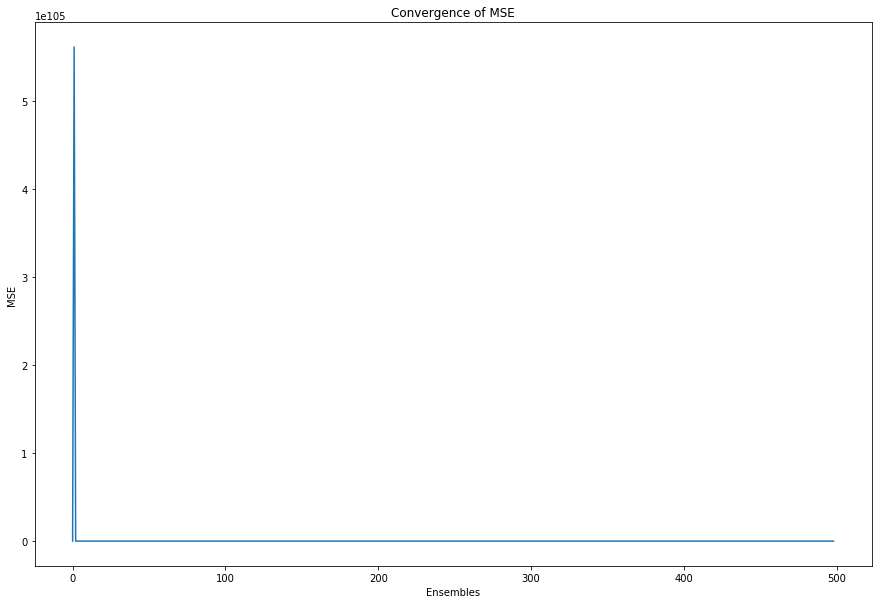

<Figure size 432x288 with 0 Axes>

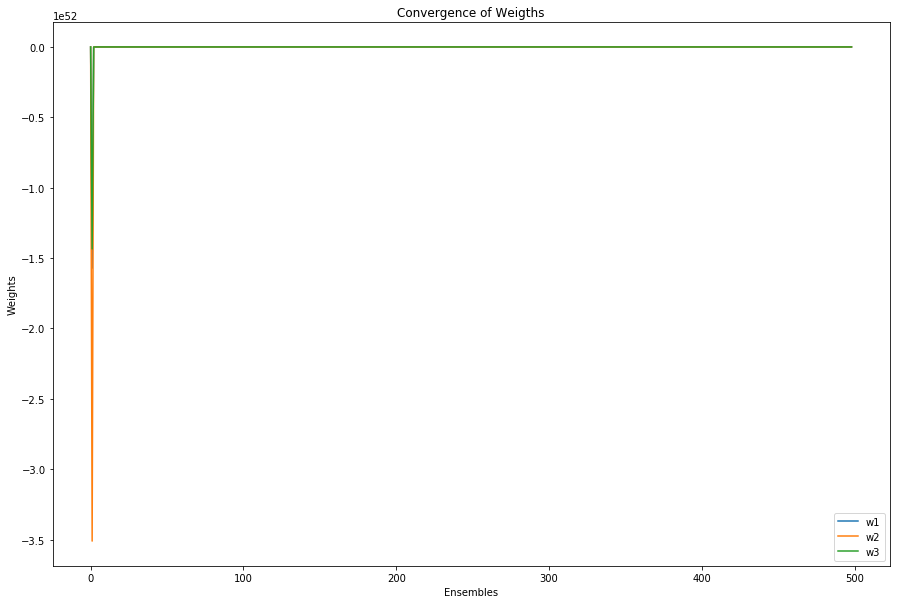

In [4]:
for mu_start in np.arange(0,6.01,.01):
    w = np.random.rand(3)*10
    #print(w)
    errors = []
    weights = []
    mu =  mu_start#1.28*50 #.5mu, .01mu, 50mu
    w_ensemble = []
    er_ensemble = []
    ensemble_size = 100
    for idx, x in enumerate(X):
        mu = mu/2.0 if idx%50==0 else mu
        #determine prediction
       # print("X,w,x_hat",x,w,x_hat)
        x_hat = np.dot(w,x)

        #find error
        errors.append((x_hat-y[idx])**2)
        if len(errors)%ensemble_size==0 and len(errors)>0:
            er_ensemble.append(np.sum(np.array(errors[-ensemble_size:]),axis=0)/ensemble_size)

        #update weights
        w += -mu*2*(x_hat-y[idx])*x
        #print("y,w",y[idx],w)
        #print(w)
        weights.append(np.array(w))
        if len(weights)%ensemble_size==0 and len(weights)>0:
            w_ensemble.append(np.sum(np.array(weights[-ensemble_size:]),axis=0)/ensemble_size)

    print("Mu",mu_start)
    print("Last weight Ensemble:",w_ensemble[-1])
    print("last error Ensemble:",er_ensemble[-1])

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(er_ensemble)), er_ensemble)
plt.title("Convergence of MSE")
plt.xlabel("Ensembles")
plt.ylabel("MSE")

#print(errors[-500:])
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(w_ensemble)
plt.legend(["w1","w2","w3"])
plt.title("Convergence of Weigths")
plt.xlabel("Ensembles")
plt.ylabel("Weights")

In [273]:
x = [[1,2,4],[4,3,3]]
np.sum(x,axis=0)
y = [1,2,4,5,6,7]
y[-5]

2

## Problem 7*:

In [281]:
#note 3 tap means 3 previous values
n_sample = 50000

gn = [np.random.normal(),np.random.normal(),np.random.normal()]
data = []
for idx in range(3,n_sample+3):
    g = np.random.normal()
    gn.append(g)
    data.append(.1*g+.5*gn[idx-1]-.5*gn[idx-2]+.1*gn[idx-3]) # x_[n] = u_[n] + 0.8*x_[n-1]

X = []
y = []
for three_sample_before, two_sample_before, one_sample_before, curr in zip(data[0:-3:], data[1:-2:], data[2:-1:],data[3::]):
    vector1 = np.array([one_sample_before, two_sample_before, three_sample_before]) 
    vector2 = np.array([curr, one_sample_before, two_sample_before]) # for R
    X.append(vector1)
    y.append(curr)

X = np.vstack(X)
y = np.array(y)

mu 0.0
Last weight Ensemble: [2.85812775 5.29577777 9.83032934]
last error Ensemble: 37.074216477247504
mu 0.01
Last weight Ensemble: [2.98940633 4.56749413 6.21096812]
last error Ensemble: 16.675788723068138
mu 0.02
Last weight Ensemble: [2.04367376 4.8753821  4.72923255]
last error Ensemble: 11.47560842069364
mu 0.03
Last weight Ensemble: [1.14888558 2.34159628 1.45762795]
last error Ensemble: 2.6459629118529886
mu 0.04
Last weight Ensemble: [2.451744   3.68981215 2.5022716 ]
last error Ensemble: 6.181964000219007
mu 0.05
Last weight Ensemble: [2.35597128 4.11614097 3.05806402]
last error Ensemble: 7.299800961914513
mu 0.06
Last weight Ensemble: [1.82453265 3.09064987 2.08307702]
last error Ensemble: 4.377837039080677
mu 0.07
Last weight Ensemble: [1.18548388 2.3089269  1.66531224]
last error Ensemble: 2.7254244737612954
mu 0.08
Last weight Ensemble: [0.80292591 1.69827274 1.20016492]
last error Ensemble: 1.7352358270706711
mu 0.09
Last weight Ensemble: [0.57371082 1.3813781  1.00265

mu 0.76
Last weight Ensemble: [-0.87171997 -0.66360616 -0.36011484]
last error Ensemble: 0.4218698413659249
mu 0.77
Last weight Ensemble: [-0.81285298 -0.57772633 -0.30059945]
last error Ensemble: 0.3999996606200451
mu 0.78
Last weight Ensemble: [-0.84194933 -0.61867318 -0.32841018]
last error Ensemble: 0.4098646269647048
mu 0.79
Last weight Ensemble: [-0.90263609 -0.7050548  -0.38724651]
last error Ensemble: 0.43455058693585336
mu 0.8
Last weight Ensemble: [-0.96946501 -0.80018661 -0.451842  ]
last error Ensemble: 0.4679152044328323
mu 0.81
Last weight Ensemble: [-0.84450325 -0.61950236 -0.32792872]
last error Ensemble: 0.4102663520066028
mu 0.8200000000000001
Last weight Ensemble: [-0.9930857  -0.83209208 -0.47242391]
last error Ensemble: 0.48065467733964157
mu 0.8300000000000001
Last weight Ensemble: [-0.81644796 -0.57745651 -0.29868864]
last error Ensemble: 0.4003046638188228
mu 0.84
Last weight Ensemble: [-0.74734207 -0.47752797 -0.23066958]
last error Ensemble: 0.3814607907035155

mu 1.51
Last weight Ensemble: [ -69.73851879 -103.41515203  -70.63980271]
last error Ensemble: 3748.4520927126578
mu 1.52
Last weight Ensemble: [-14.73701344 -21.30663587 -14.4582125 ]
last error Ensemble: 156.39572553400546
mu 1.53
Last weight Ensemble: [-110.48550413 -163.95275949 -111.82029289]
last error Ensemble: 9436.629973287758
mu 1.54
Last weight Ensemble: [-39.10944829 -57.56966755 -39.1683755 ]
last error Ensemble: 1156.9526748233172
mu 1.55
Last weight Ensemble: [-105.9323004  -156.96513157 -106.87220897]
last error Ensemble: 8646.70855758596
mu 1.56
Last weight Ensemble: [ -9.1276008  -12.90881102  -8.69153799]
last error Ensemble: 56.71253247984084
mu 1.57
Last weight Ensemble: [19.84349868 30.15930043 20.621185  ]
last error Ensemble: 326.065683131656
mu 1.58
Last weight Ensemble: [-129.56627503 -191.82719043 -130.34950538]
last error Ensemble: 12918.447956048361
mu 1.59
Last weight Ensemble: [-48.14046295 -70.82456532 -48.0341328 ]
last error Ensemble: 1753.087862795612

mu 2.23
Last weight Ensemble: [-15173.51630233 -22601.6371189  -15249.10139434]
last error Ensemble: 179014778.03612098
mu 2.24
Last weight Ensemble: [-54965.32626836 -81873.48702314 -55228.89284814]
last error Ensemble: 2348939199.451411
mu 2.25
Last weight Ensemble: [-47.21478345 -70.11339264 -47.49528664]
last error Ensemble: 1710.219379726504
mu 2.2600000000000002
Last weight Ensemble: [-5879.73670688 -8757.75314795 -5905.70316159]
last error Ensemble: 26871158.753558427
mu 2.27
Last weight Ensemble: [-32875.88007409 -48966.89705083 -33012.50230762]
last error Ensemble: 840035194.5550672
mu 2.2800000000000002
Last weight Ensemble: [50069.06717944 74572.70543102 50264.57629728]
last error Ensemble: 1948185625.279899
mu 2.29
Last weight Ensemble: [ -97844.25734583 -145723.69720796  -98204.31887512]
last error Ensemble: 7438701384.620039
mu 2.3000000000000003
Last weight Ensemble: [-19385.69136966 -28870.98977145 -19452.87561581]
last error Ensemble: 291961052.3346584
mu 2.31
Last wei

mu 2.9
Last weight Ensemble: [11532526.71741936 17192054.32500317 11509146.98081423]
last error Ensemble: 103214845103673.92
mu 2.91
Last weight Ensemble: [ -9006653.65071155 -13427106.85298117  -8988203.84173263]
last error Ensemble: 62955662167341.16
mu 2.92
Last weight Ensemble: [2056059.88828659 3065334.80525138 2051877.65602083]
last error Ensemble: 3281022923110.759
mu 2.93
Last weight Ensemble: [-40390176.25657941 -60217441.91201625 -40305157.56695034]
last error Ensemble: 1266140337197919.2
mu 2.94
Last weight Ensemble: [-2910250.29978484 -4338988.44791788 -2904018.38366938]
last error Ensemble: 6573522988994.626
mu 2.95
Last weight Ensemble: [3878414.25081716 5782732.97934486 3870136.09856085]
last error Ensemble: 11675397367683.16
mu 2.96
Last weight Ensemble: [-1.52684002e+08 -2.27661104e+08 -1.52356274e+08]
last error Ensemble: 1.809536732118172e+16
mu 2.97
Last weight Ensemble: [33098195.62501701 49353159.95564833 33026635.05577565]
last error Ensemble: 850362821672545.8
m

mu 3.56
Last weight Ensemble: [2.37706966e+11 3.55190730e+11 2.37508349e+11]
last error Ensemble: 4.399285582418337e+22
mu 3.5700000000000003
Last weight Ensemble: [-3.91355485e+11 -5.84800037e+11 -3.91053703e+11]
last error Ensemble: 1.1925363632836586e+23
mu 3.58
Last weight Ensemble: [1.63237131e+11 2.43933352e+11 1.63121989e+11]
last error Ensemble: 2.074900984563597e+22
mu 3.59
Last weight Ensemble: [-7.67191253e+11 -1.14649494e+12 -7.66701544e+11]
last error Ensemble: 4.5835046786431876e+23
mu 3.6
Last weight Ensemble: [5.05796094e+11 7.55892861e+11 5.05507802e+11]
last error Ensemble: 1.9923814527607476e+23
mu 3.61
Last weight Ensemble: [6.23159854e+11 9.31323392e+11 6.22848042e+11]
last error Ensemble: 3.024487943134286e+23
mu 3.62
Last weight Ensemble: [-4.24533441e+11 -6.34496481e+11 -4.24351096e+11]
last error Ensemble: 1.403809979710688e+23
mu 3.63
Last weight Ensemble: [4.90180691e+10 7.32638565e+10 4.90005497e+10]
last error Ensemble: 1.8716675931283147e+21
mu 3.64
Last w

mu 4.23
Last weight Ensemble: [1.08532486e+14 1.62507401e+14 1.09120602e+14]
last error Ensemble: 9.216603057512897e+27
mu 4.24
Last weight Ensemble: [1.45324931e+14 2.17600585e+14 1.46127809e+14]
last error Ensemble: 1.652563124994759e+28
mu 4.25
Last weight Ensemble: [-3.94968710e+13 -5.91410247e+13 -3.97192556e+13]
last error Ensemble: 1.2207569684727756e+27
mu 4.26
Last weight Ensemble: [1.56708490e+13 2.34652174e+13 1.57607366e+13]
last error Ensemble: 1.9218279271169517e+26
mu 4.2700000000000005
Last weight Ensemble: [-1.78823485e+14 -2.67770159e+14 -1.79868036e+14]
last error Ensemble: 2.50267085201541e+28
mu 4.28
Last weight Ensemble: [1.39765263e+14 2.09286928e+14 1.40596344e+14]
last error Ensemble: 1.5288957357892948e+28
mu 4.29
Last weight Ensemble: [-1.85342819e+14 -2.77538677e+14 -1.86464326e+14]
last error Ensemble: 2.688779587082777e+28
mu 4.3
Last weight Ensemble: [-1.75027089e+14 -2.62094296e+14 -1.76104450e+14]
last error Ensemble: 2.397938602122622e+28
mu 4.31000000

mu 4.9
Last weight Ensemble: [6.28930309e+15 9.40299867e+15 6.35343077e+15]
last error Ensemble: 3.095624426406706e+31
mu 4.91
Last weight Ensemble: [3.24643487e+15 4.85326008e+15 3.27948164e+15]
last error Ensemble: 8.247274574063437e+30
mu 4.92
Last weight Ensemble: [2.89186594e+15 4.32281465e+15 2.92123803e+15]
last error Ensemble: 6.543416064714139e+30
mu 4.93
Last weight Ensemble: [-3.27685280e+14 -4.89785014e+14 -3.31004149e+14]
last error Ensemble: 8.400602771755724e+28
mu 4.94
Last weight Ensemble: [2.47948190e+15 3.70568100e+15 2.50450794e+15]
last error Ensemble: 4.8091004753892724e+30
mu 4.95
Last weight Ensemble: [3.35534946e+15 5.01420108e+15 3.38907619e+15]
last error Ensemble: 8.805616671047247e+30
mu 4.96
Last weight Ensemble: [5.60542724e+15 8.37583073e+15 5.66149794e+15]
last error Ensemble: 2.4572012429179406e+31
mu 4.97
Last weight Ensemble: [5.13329606e+15 7.66953207e+15 5.18435554e+15]
last error Ensemble: 2.0603997900426677e+31
mu 4.98
Last weight Ensemble: [5.49

mu 5.57
Last weight Ensemble: [2.28321884e+16 3.40337213e+16 2.32252178e+16]
last error Ensemble: 4.077675937204628e+32
mu 5.58
Last weight Ensemble: [-9.80531422e+16 -1.46123217e+17 -9.97143963e+16]
last error Ensemble: 7.517454369783885e+33
mu 5.59
Last weight Ensemble: [7.54693756e+16 1.12441668e+17 7.67286860e+16]
last error Ensemble: 4.451698562660159e+33
mu 5.6000000000000005
Last weight Ensemble: [-1.95019042e+17 -2.90492574e+17 -1.98225986e+17]
last error Ensemble: 2.97153201108173e+34
mu 5.61
Last weight Ensemble: [1.06204126e+17 1.58162409e+17 1.07926175e+17]
last error Ensemble: 8.809602896900139e+33
mu 5.62
Last weight Ensemble: [-3.15298783e+17 -4.69450903e+17 -3.20342308e+17]
last error Ensemble: 7.761932660621949e+34
mu 5.63
Last weight Ensemble: [-1.22989420e+17 -1.83081116e+17 -1.24931132e+17]
last error Ensemble: 1.1806375954218324e+34
mu 5.64
Last weight Ensemble: [-8.60378603e+16 -1.28048658e+17 -8.73790567e+16]
last error Ensemble: 5.77590196025704e+33
mu 5.65
Last

Text(0,0.5,'Weights')

<Figure size 432x288 with 0 Axes>

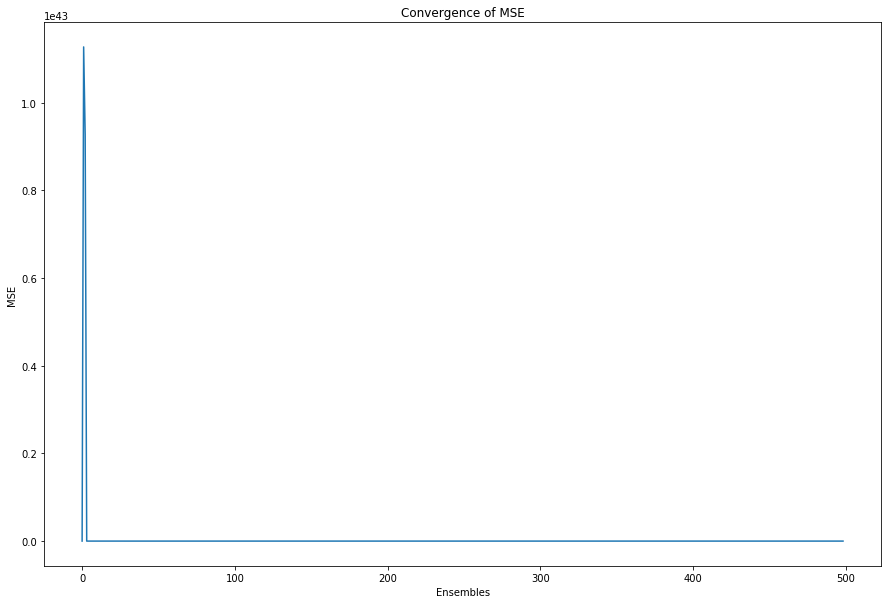

<Figure size 432x288 with 0 Axes>

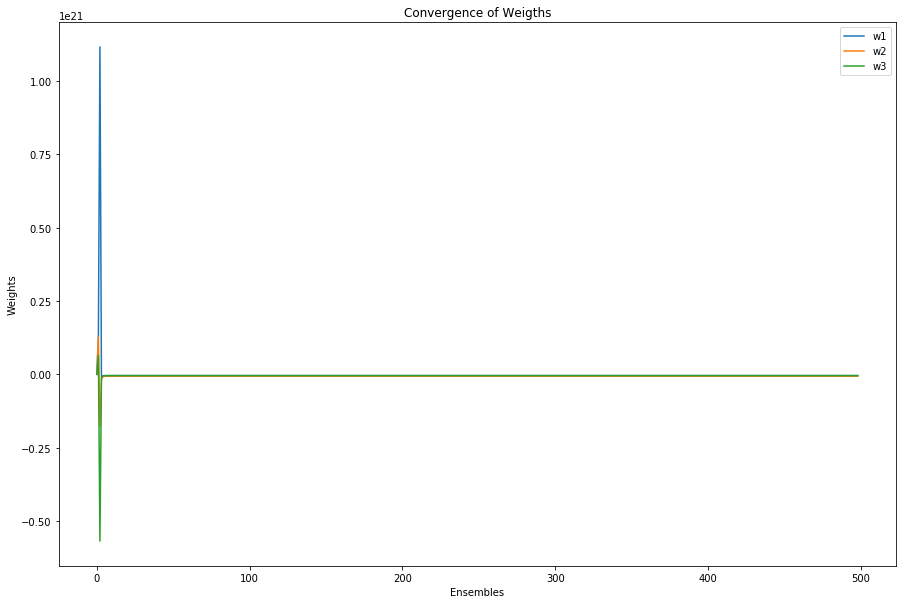

In [285]:
for mu_start in np.arange(0,6.01,.01):
    w = np.random.rand(3)*10
    #print(w)
    errors = []
    weights = []
    mu = mu_start #.5mu, .01mu, 50mu
    w_ensemble = []
    er_ensemble = []
    grads = []
    ensemble_size = 100

    for idx, x in enumerate(X):
        mu = mu/2.0 if idx%50==0 else mu
        #determine prediction
       # print("X,w,x_hat",x,w,x_hat)
        x_hat = np.dot(w,x)

        #find error
        errors.append((x_hat-y[idx])**2)
        if len(errors)%ensemble_size==0 and len(errors)>0:
            er_ensemble.append(np.sum(np.array(errors[-ensemble_size:]),axis=0)/ensemble_size)

        #update weights
        grads.append((x_hat-y[idx])*x)
        if idx>4:
            w += -mu*2*grads[-5]
        #print("y,w",y[idx],w)
        #print(w)
        weights.append(np.array(w))
        if len(weights)%ensemble_size==0 and len(weights)>0:
            w_ensemble.append(np.sum(np.array(weights[-ensemble_size:]),axis=0)/ensemble_size)

    print("mu",mu_start)
    print("Last weight Ensemble:",w_ensemble[-1])
    print("last error Ensemble:",er_ensemble[-1])

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(range(len(er_ensemble)), er_ensemble)
plt.title("Convergence of MSE")
plt.xlabel("Ensembles")
plt.ylabel("MSE")

#print(errors[-500:])
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(w_ensemble)
plt.legend(["w1","w2","w3"])
plt.title("Convergence of Weigths")
plt.xlabel("Ensembles")
plt.ylabel("Weights")